#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [1]:
import sys

sys.path.append('../../../../')

In [2]:
# Importando a seleção negativa.
from aisp.imnet import AiNet

 
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### 2. Gerando bolhas de dados para as classe aleatoriamente.

Utilizando a função make_blobs, são gerados dois conjuntos de dados em forma de bolhas, no intervalo entre 0 e 1, representando cada classe x e y. Em seguida, esses dados são separados em conjuntos de teste e treinamento.

In [3]:
# Gerando as amostras e saídas para o treinamento.
samples, output = make_blobs(
    n_samples=500,
    cluster_std=0.07,
    center_box=(0.0, 1.0),
    centers=[[0.25, 0.75], [0.75, 0.25]],
    random_state=1234,
)

# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

In [4]:
model = AiNet(suppression_threshold=0.96, affinity_threshold=0.97)

model.fit(train_x)

 ┇          ┇ 0/10 total training interactions

✔ Set of memory antibodies for classes () successfully generated:  ┇██████████┇ 10/10 total training interactions


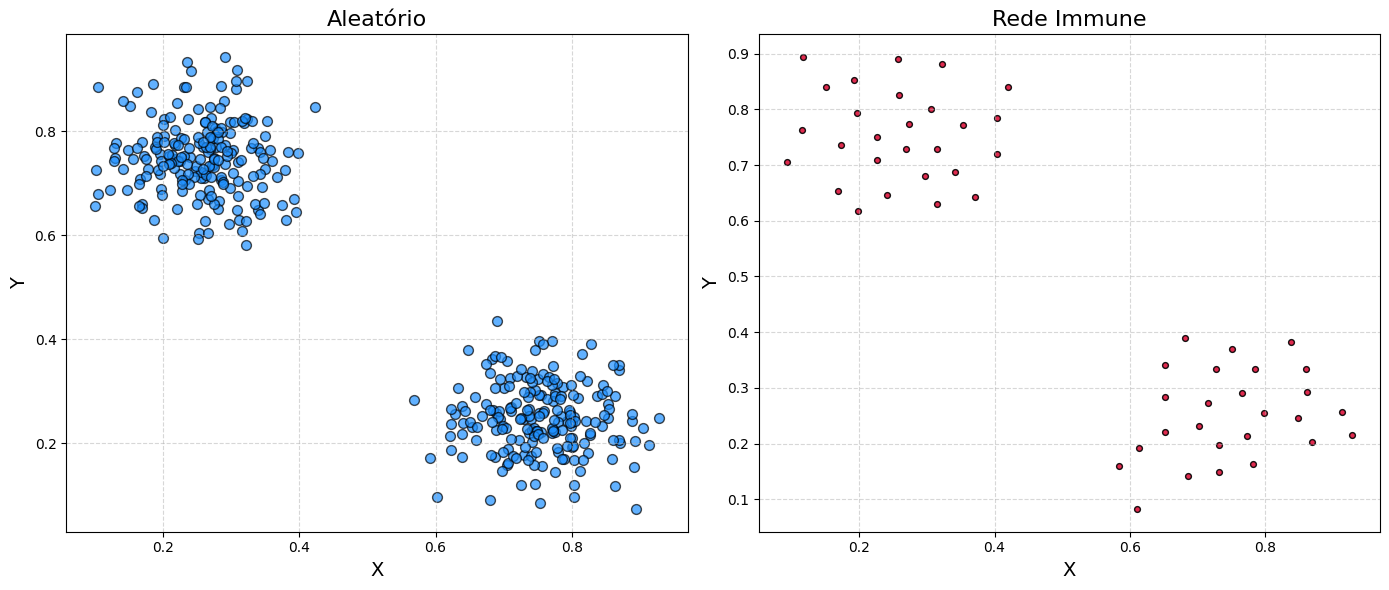

In [5]:
network = np.array(model.memory_network)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(train_x[:, 0], train_x[:, 1], color='dodgerblue', alpha=0.7, s=50, marker='o', edgecolors='k')
axs[0].set_title('Aleatório', fontsize=16)
axs[0].set_xlabel('X', fontsize=14)
axs[0].set_ylabel('Y', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

axs[1].scatter(network[:, 0], network[:, 1], color='crimson', alpha=0.9, s=70, marker='.', edgecolors='k')
axs[1].set_title('Rede Immune', fontsize=16)
axs[1].set_xlabel('X', fontsize=14)
axs[1].set_ylabel('Y', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [6]:
# Gerando as amostras e saídas para o treinamento.
samples, output = make_moons(n_samples=500, noise=0.05, random_state=42)
samples = MinMaxScaler().fit_transform(samples)
# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

In [7]:
model = AiNet(suppression_threshold=0.96, affinity_threshold=0.97)

model.fit(train_x)

✔ Set of memory antibodies for classes () successfully generated:  ┇██████████┇ 10/10 total training interactions


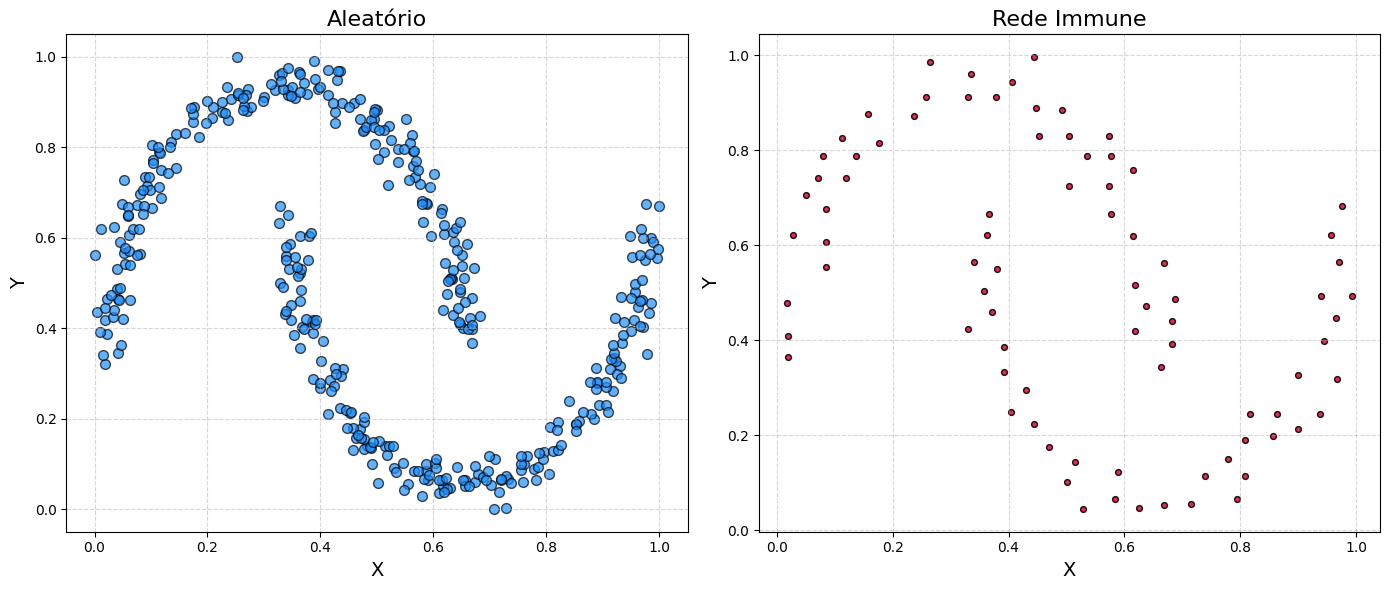

In [8]:
network = np.array(model.memory_network)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(train_x[:, 0], train_x[:, 1], color='dodgerblue', alpha=0.7, s=50, marker='o', edgecolors='k')
axs[0].set_title('Aleatório', fontsize=16)
axs[0].set_xlabel('X', fontsize=14)
axs[0].set_ylabel('Y', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

axs[1].scatter(network[:, 0], network[:, 1], color='crimson', alpha=0.9, s=70, marker='.', edgecolors='k')
axs[1].set_title('Rede Immune', fontsize=16)
axs[1].set_xlabel('X', fontsize=14)
axs[1].set_ylabel('Y', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()